## Import your modules or packages

In [1]:
import warnings
warnings.simplefilter('ignore') # filter some warning messages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

# `pandas` and csv files
## First read your data into a dataframe, and take a look

In [2]:
# read data into a dataframe
df_T = pd.read_csv('./../data/AllT_updated.csv', index_col=0)
# display the first lines, the last lines, and all
df_T.head()

,YEAR,MONTH,DAY,SST,Temperature
Datetime,,,,,
1981-01-01,1981.0,1.0,1.0,NaN,NaN
1981-01-02,1981.0,1.0,2.0,NaN,NaN
1981-01-03,1981.0,1.0,3.0,NaN,NaN
1981-01-04,1981.0,1.0,4.0,NaN,NaN
1981-01-05,1981.0,1.0,5.0,NaN,NaN


<AxesSubplot:xlabel='Datetime'>

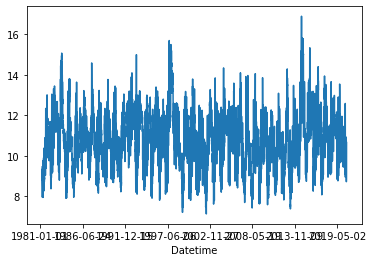

In [3]:
# quick plot of one column
df_T['Temperature'].plot()

<AxesSubplot:xlabel='Datetime'>

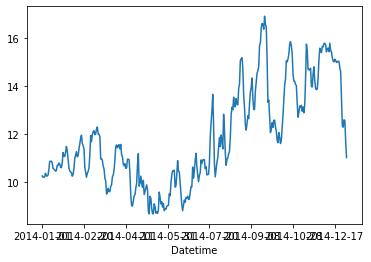

In [4]:
# selection of a particular year and a column, and then plot
df_T[df_T['YEAR']==2014]['Temperature'].plot()

----------

# `xarray` and Satellite data

# One day of Data
## Get some data and check what's in it

In [5]:
# assign an url of where the data is in NETCDF format
url = 'https://podaac-opendap.jpl.nasa.gov/opendap/allData/ghrsst/data/GDS2/L4/GLOB/CMC/CMC0.2deg/v2/2011/305/20111101120000-CMC-L4_GHRSST-SSTfnd-CMC0.2deg-GLOB-v02.0-fv02.0.nc'

# open the url with xarray!
ds_sst = xr.open_dataset(url)

# an object or variable in the last line display what is in it
ds_sst 

<xarray.Dataset>
Dimensions:           (lat: 901, lon: 1800, time: 1)
Coordinates:
  * time              (time) datetime64[ns] 2011-11-01T12:00:00
  * lat               (lat) float32 -90.0 -89.8 -89.6 -89.4 ... 89.6 89.8 90.0
  * lon               (lon) float32 -180.0 -179.8 -179.6 ... 179.4 179.6 179.8
Data variables:
    analysed_sst      (time, lat, lon) float32 ...
    analysis_error    (time, lat, lon) float32 ...
    sea_ice_fraction  (time, lat, lon) float32 ...
    mask              (time, lat, lon) float32 ...
Attributes:
    Conventions:                CF-1.4
    title:                      CMC 0.2 deg global sea surface temperature an...
    summary:                    Applies the method of statistical interpolati...
    references:                 Brasnett B. 2008. The impact of satellite ret...
    institution:                CMC
    history:                    Processed through sfc.thin_sst, sfc.sstobs, i...
    comment:                    WARNING Some applications are unable to prope...
    license:                    GHRSST protocol describes data use as free an...
    id:                         CMC0.2deg-CMC-L4-GLOB-v2.0
    naming_authority:           org.ghrsst
    product_version:            2.0
    uuid:                       67270ff2-25d7-4390-8bc1-fee0a6209243
    gds_version_id:             02.5
    netcdf_version_id:          4.3.0
    date_created:               20131004T160824Z
    file_quality_level:         3
    spatial_resolution:         0.2 degree
    start_time:                 20111101T000000Z
    time_coverage_start:        20111101T000000Z
    stop_time:                  20111102T000000Z
    time_coverage_end:          20111102T000000Z
    northernmost_latitude:      90.0
    southernmost_latitude:      -90.0
    westernmost_longitude:      -180.0
    easternmost_longitude:      179.8
    source:                     EUR-L2P-ATS_NR_2P,NAVO-L2P-AVHRR18_G,NAVO-L2P...
    platform:                   Envisat,NOAA-18,Coriolis,MetOpA,NOAA-19
    sensor:                     AATSR,AVHRR_GAC,Windsat
    metadata_link:              http://podaac.jpl.nasa.gov/ws/metadata/datase...
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    keywords:                   Oceans > Ocean Temperature > Sea Surface Temp...
    keywords_vocabulary:        NASA Global Change Master Directory (GCMD) Sc...
    standard_name_vocabulary:   NetCDF Climate and Forecast (CF) Metadata Con...
    geospatial_lat_units:       degrees_north
    geospatial_lat_resolution:  0.2
    geospatial_lon_units:       degrees_east
    geospatial_lon_resolution:  0.2
    acknowledgment:             Please acknowledge the use of these data with...
    creator_name:               Bruce Brasnett, Environment Canada
    creator_email:              Bruce.Brasnett@ec.gc.ca
    creator_url:                http://www.ec.gc.ca/scitech/default.asp?lang=...
    project:                    Group for High Resolution Sea Surface Tempera...
    publisher_name:             GHRSST Project Office
    publisher_url:              http://www.ghrsst.org
    publisher_email:            ghrsst-po@nceo.ac.uk
    processing_level:           L4
    cdm_data_type:              grid

In [6]:
# Display values (or data) from a variable in the Dataset
ds_sst.analysed_sst.data

array([[[271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        ...,
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35]]],
      dtype=float32)

In [7]:
# Display attributes of a variable in the Dataset
ds_sst.analysed_sst.attrs

{'long_name': 'analysed sea surface temperature',
 'standard_name': 'sea_surface_foundation_temperature',
 'units': 'kelvin',
 'valid_min': -200,
 'valid_max': 4000,
 'source': 'EUR-L2P-ATS_NR_2P,NAVO-L2P-AVHRR18_G,NAVO-L2P-AVHRRMTA_G,NAVO-L2P-AVHRR19_G,REMSS-WINDSAT,IN_SITU-GTS_BUOYS,IN_SITU-GTS_SHIP,ICE-CMC',
 'comment': 'SST defined at all grid points but no physical meaning is ascribed to values over land'}

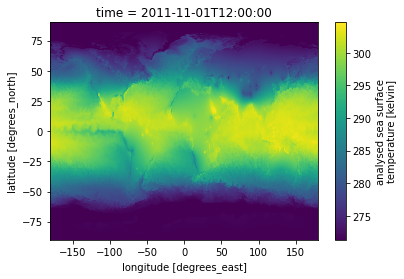

In [8]:
# Easy plot of a variable in a Dataset
ds_sst.analysed_sst.plot()

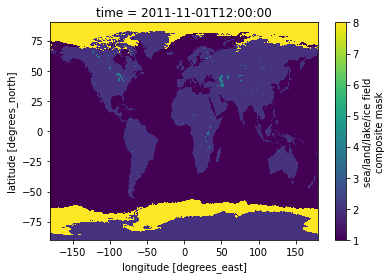

In [9]:
# and now the mask
ds_sst.mask.plot()

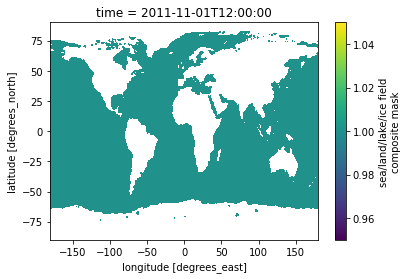

In [10]:
# selecting the ocean mask
mask_ocean = ds_sst.mask.where(ds_sst.mask==1)
mask_ocean.plot()

<xarray.DataArray (time: 1, lat: 901, lon: 1800)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2011-11-01T12:00:00
  * lat      (lat) float32 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float32 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8

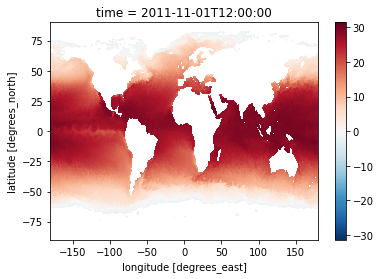

In [11]:
# get sea surface temperature with mask, in Celsius
sst_global = ds_sst.analysed_sst*mask_ocean
sst_global -= 273.15
sst_global.plot()
sst_global

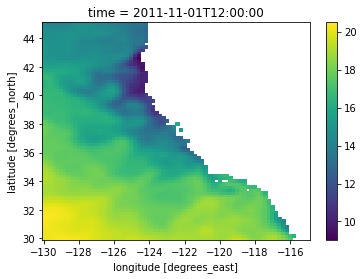

In [12]:
# Lets focus in our neigborhood
sst_california = sst_global.sel(lat=slice(30,45),lon=slice(-130,-115))
sst_california.plot()

In [13]:
# take the average of a box
sst_cal_pt = sst_global.sel(lat=slice(38,42),lon=slice(-126,-123)).mean()
sst_cal_pt.data

array(12.696466, dtype=float32)

----------

## [MUR SST](https://podaac.jpl.nasa.gov/Multi-scale_Ultra-high_Resolution_MUR-SST) [AWS Public dataset program](https://registry.opendata.aws/mur/) 

### Access the MUR SST Zarr store which is in an s3 bucket.  

![image](https://podaac.jpl.nasa.gov/Podaac/thumbnails/MUR-JPL-L4-GLOB-v4.1.jpg)

We will start with my favorite Analysis Ready Data (ARD) format: [Zarr](https://zarr.readthedocs.io/en/stable/).  Using data stored in Zarr is fast, simple, and contains all the metadata normally in a netcdf file, so you can figure out easily what is in the datastore.  

- Fast - Zarr is fast because all the metadata is consolidated into a .json file.  Reading in massive datasets is lightning fast because it only reads the metadata and does read in data until it needs it for compute.ac

- Simple - Filenames?  Who needs them? Who cares?  Not I.  Simply point your read routine to the data directory.

- Metadata - all you want!

In [ ]:
# filter some warning messages
import warnings 
warnings.filterwarnings("ignore") 

#libraries
import datetime as dt
import xarray as xr
import fsspec
import s3fs
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
# make datasets display nicely
xr.set_options(display_style="html")  

#magic fncts #put static images of your plot embedded in the notebook
%matplotlib inline  
plt.rcParams['figure.figsize'] = 12, 6
%config InlineBackend.figure_format = 'retina' 

In [ ]:
%%time
file_location = 's3://mur-sst/zarr'

ikey = fsspec.get_mapper(file_location, anon=True)

ds_sst = xr.open_zarr(ikey,consolidated=True)

ds_sst

### Read entire 10 years of data at 1 point.

Select the ``analysed_sst`` variable over a specific time period, `lat`, and `lon` and load the data into memory.  This is small enough to load into memory which will make calculating climatologies easier in the next step.

In [ ]:
%%time

sst_timeseries = ds_sst['analysed_sst'].sel(time = slice('2010-01-01','2020-01-01'),
                                            lat  = 47,
                                            lon  = -145
                                           ).load()

sst_timeseries.plot()

### The anomaly is more interesting...  

Use [.groupby](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.groupby.html#xarray-dataarray-groupby) method to calculate the climatology and [.resample](http://xarray.pydata.org/en/stable/generated/xarray.Dataset.resample.html#xarray-dataset-resample) method to then average it into 1-month bins.
- [DataArray.mean](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.mean.html#xarray-dataarray-mean) arguments are important! Xarray uses metadata to plot, so keep_attrs is a nice feature.  Also, for SST there are regions with changing sea ice.  Setting skipna = False removes these regions. 

In [ ]:
%%time

sst_climatology = sst_timeseries.groupby('time.dayofyear').mean('time',keep_attrs=True,skipna=False)

sst_anomaly = sst_timeseries.groupby('time.dayofyear')-sst_climatology

sst_anomaly_monthly = sst_anomaly.resample(time='1MS').mean(keep_attrs=True,skipna=False)

#plot the data
sst_anomaly.plot()
sst_anomaly_monthly.plot()
plt.axhline(linewidth=2,color='k')
plt.savefig('./figures/sst_anomaly.png')